#### Importing the libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing the dataset

In [2]:
df = pd.read_csv('electronics.csv')

In [3]:
# List of first five rows

df.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0


In [4]:
# List of last five rows

df.tail()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2017,NaN,0
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,NaN,2017,NaN,0
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,NaN,2016,NaN,0
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,NaN,2018,NaN,0
1292953,9478,1157632,1.0,2018-10-01,Female,Headphones,Etre Jeune,2017,Female,0


In [5]:
# Display the number of rows and columns

df.shape

(1292954, 10)

- There are 1292954 rows and 10 columns in the dataset.

In [6]:
# Dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB


- We can see that the columns User_id, Item_it are of int64 data type, while the columns Brand and Category are of object data type.
- We can also see that the column Timestamp is of object data type, but it is actually a timestamp.

In [7]:
# Check missing values

df.isnull().sum()

item_id             0
user_id             0
rating              0
timestamp           0
model_attr          0
category            0
brand          961834
year                0
user_attr     1118830
split               0
dtype: int64

In [8]:
# Calculate the percentage of missing values in each column

df.isna().mean().round(4) * 100

item_id        0.00
user_id        0.00
rating         0.00
timestamp      0.00
model_attr     0.00
category       0.00
brand         74.39
year           0.00
user_attr     86.53
split          0.00
dtype: float64

- The percentage of missing values for the columns 'brand' and 'user_attr' is ~74% and ~87% respectively.

In [9]:
# Check the number of unique values in the dataset.

df.nunique()

item_id          9560
user_id       1157633
rating              5
timestamp        6354
model_attr          3
category           10
brand              50
year               20
user_attr           2
split               3
dtype: int64

In [10]:
# check for duplicates

df.duplicated().sum()

0

- There is no duplicate rows.

#### Data pre-processing

In [11]:
# Renaming and Selecting Columns in a Dataset

df.rename(columns = {'item_id':'Item_id', 'user_id':'User_id', 'rating':'Rating', 'timestamp':'Timestamp', 'model_attr':'Model_attr', 'category':'Category', 'brand':'Brand', 'year':'Year', 'user_attr':'User_attr', 'split':'Split'},inplace=True)

In [12]:
# Convert data type of timestamp column using datetime()

from datetime import datetime

pd.to_datetime(df['Timestamp'])

0         1999-06-13
1         1999-06-14
2         1999-06-17
3         1999-07-01
4         1999-07-06
             ...    
1292949   2018-09-26
1292950   2018-09-26
1292951   2018-09-26
1292952   2018-09-29
1292953   2018-10-01
Name: Timestamp, Length: 1292954, dtype: datetime64[ns]

In [13]:
# Extract month from Timestamp column using DatetimeIndex.month attribute

df['Month'] = pd.DatetimeIndex(df['Timestamp']).month
df.head()

,Item_id,User_id,Rating,Timestamp,Model_attr,Category,Brand,Year,User_attr,Split,Month
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0,6
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0,6
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0,6
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0,7
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0,7


In [14]:
# drop all null values and duplicate values

df.dropna(inplace=True)

df.drop_duplicates(inplace=True)

In [15]:
df.isnull().sum()

Item_id       0
User_id       0
Rating        0
Timestamp     0
Model_attr    0
Category      0
Brand         0
Year          0
User_attr     0
Split         0
Month         0
dtype: int64

In [16]:
df.shape

(45166, 11)

- After droping null values, the number of rows of our dataset reduced to 45166.

#### EDA

In [17]:
# Statistical summary about numeric column

df[['Rating', 'Year', 'Split']].describe().astype(int)     #-----> I took some specific columns

,Rating,Year,Split
count,45166,45166,45166
mean,4,2012,0
std,1,3,0
min,1,2000,0
25%,4,2011,0
50%,5,2013,0
75%,5,2014,0
max,5,2018,2


- 1. The mean rating is 4.

- 2. The minimum rating is 1.

- 3. The maximum rating is 5.

- 4. The standard deviation of the ratings is 1.

- 5. The 25th percentile of the ratings is 4.

- 6. The 50th percentile of the ratings is 5.

- 7. The 75th percentile of the ratings is 5.

In [18]:
# Display the distribution of Model_attr

df["Model_attr"].value_counts()

Female         15839
Female&Male    15124
Male           14203
Name: Model_attr, dtype: int64

<AxesSubplot:xlabel='Model_attr', ylabel='count'>

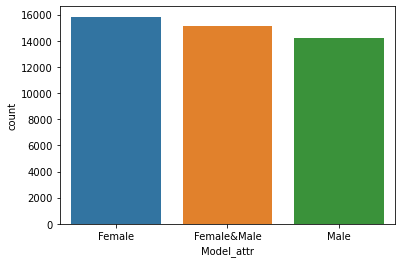

In [19]:
sns.countplot(x = 'Model_attr', data=df )

- We can see that there is a relatively balanced representation of products designed for both genders, with a slightly higher emphasis on products targeted towards females.

In [20]:
# Display the distribution of User_attr

df['User_attr'].value_counts()

Male      23110
Female    22056
Name: User_attr, dtype: int64

<AxesSubplot:xlabel='User_attr', ylabel='count'>

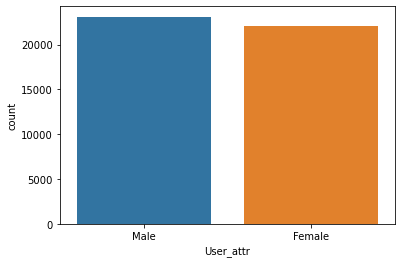

In [21]:
sns.countplot(x = 'User_attr', data=df)

- The number of male users is slightly higher (23,110 occurrences) compared to female users (22,056 occurrences).

In [22]:
# Display the distribution of Ratings 

df['Rating'].value_counts()

5.0    27883
4.0     7953
3.0     3776
1.0     3126
2.0     2428
Name: Rating, dtype: int64

<AxesSubplot:xlabel='Rating', ylabel='count'>

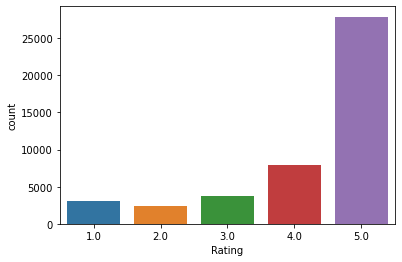

In [23]:
sns.countplot(x='Rating', data=df)

- Most of the ratings are 5.

<AxesSubplot:xlabel='Brand', ylabel='count'>

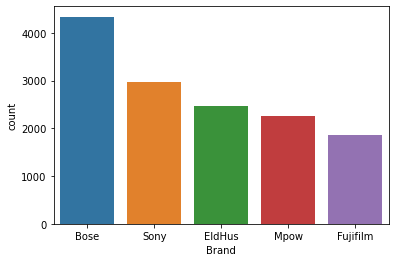

In [24]:
# Brands with the most sales

sns.countplot(x='Brand', data=df, order=df['Brand'].value_counts().iloc[1:6].index)

- The brand name Bose sold the most.

<AxesSubplot:xlabel='Brand', ylabel='count'>

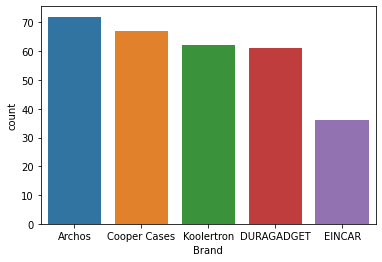

In [25]:
# Brands with the least sales

sns.countplot(x='Brand', data=df, order=df['Brand'].value_counts().iloc[-5:].index)

- We can see that the brand name of EINCAR sold the least followed closely with DURAGADGET.

<AxesSubplot:xlabel='Year'>

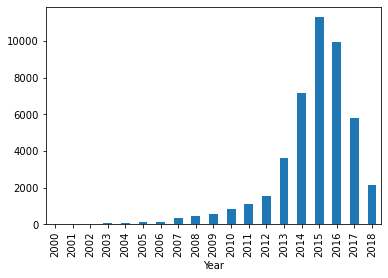

In [26]:
# Display the best year of sales

df['Year'] = pd.DatetimeIndex(df['Timestamp']).year

df.groupby('Year')['Rating'].count().plot(kind='bar')

- We can see that the year 2015 had the best sales.

<AxesSubplot:xlabel='Month', ylabel='count'>

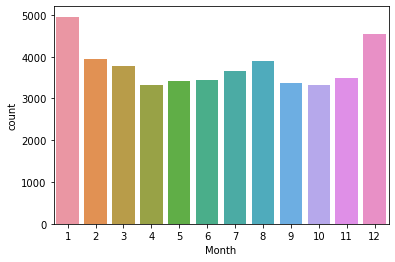

In [27]:
# Display the best month of sales

sns.countplot(x='Month', data=df)

- The month of January had the best sales.

<AxesSubplot:xlabel='Brand'>

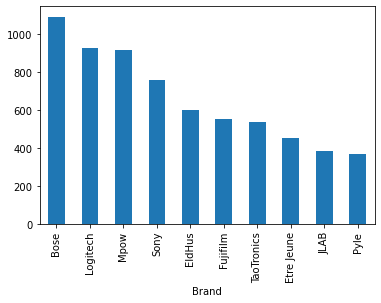

In [28]:
# Display the most selling brand in 2015

df_2015 = df[df['Year'] == 2015]

df_2015.groupby('Brand')['Rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

- Bose sold the most while the least sold was Pyle.

<AxesSubplot:xlabel='Brand'>

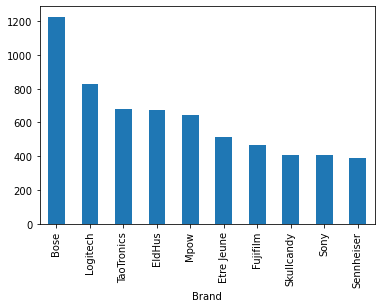

In [29]:
# Display the most selling brand in 2016

df[df['Year'] == 2016].groupby('Brand')['Rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

- The top 3 Brands sold in 2016 were Bose, Logitech & TaoTronics.

In [30]:
# Display the most selling product

df["Category"].value_counts()

Headphones                 16211
Computers & Accessories    10108
Camera & Photo              9153
Portable Audio & Video      3351
Accessories & Supplies      2414
Home Audio                  1392
Television & Video          1222
Car Electronics & GPS       1094
Security & Surveillance      134
Wearable Technology           87
Name: Category, dtype: int64

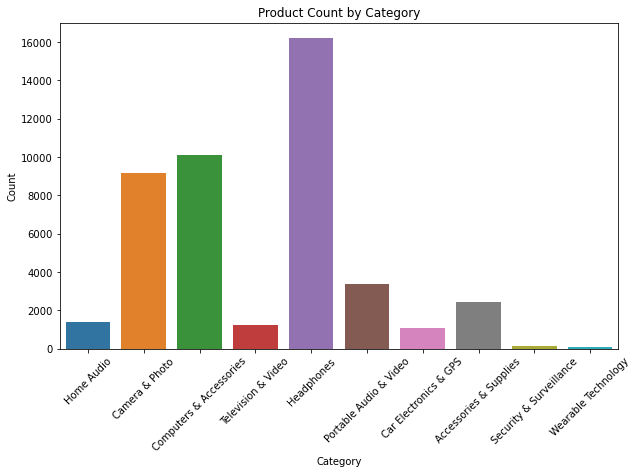

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=df)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Product Count by Category')
plt.xticks(rotation=45)  #-------------> # Rotate x-axis labels for better readability
plt.show()


- We can see that the category of Headphones sold the most while the least sold category was Wearable Technology.

#### Conclusions

- We can see that the year 2015 had the best sales.

- The month of January had the best sales.

- We can see that the brands Bose sold the most

- We can see that the category of Headphones sold the most.

- We can see that the brand name of EINCAR sold the least followed closely with DURAGADGET.

- We can see that both Wearable Technology sold the least.

In [32]:
# Export cleaned Dataset to new csv file named "electronics_cleaned.csv"

df.to_csv('electronics_cleaned.csv', index=True)